# **Student Performance Exploratory Analysis**

## Data Loading and Preprocessing

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import webbrowser

In [2]:
#loading needed databases
df_por = pd.read_csv("/Users/zoewalp/Downloads/student-por.csv")
df_mat = pd.read_csv("/Users/zoewalp/Downloads/student-mat.csv")

### Examining df_por dataset

In [3]:
df_por.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
df_por.isnull().sum().sum()

0

### Examining df_mat dataset

In [6]:
df_mat.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
df_mat.isnull().sum().sum()

0

#### Considering the correct data types and the absence of null values. Both datasets are suitable for initial analysis.

#### Changing Column Names

In [9]:
#df_por dataframe
df_por.rename(columns={'G1':'G1_por', 'G2':'G2_por', 'G3':'G3_por'}, inplace=True)
#df_mat dataframe
df_mat.rename(columns={'G1':'G1_mat', 'G2':'G2_mat', 'G3':'G3_mat'}, inplace=True)

In [10]:
df_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_por', 'G2_por', 'G3_por'],
      dtype='object')

### **Merging datasets for a more succinct analysis**

In [11]:
df_merge= pd.merge(df_mat, df_por, on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'])
df_merge=df_merge.drop_duplicates()

### Examining and cleaning merged dataset

In [12]:
df_merge.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1_mat,G2_mat,G3_mat,paid_y,G1_por,G2_por,G3_por
0,GP,M,16,U,LE3,T,2,2,other,other,...,1,3,0,12,12,11,no,13,12,13
1,GP,M,15,U,LE3,A,3,2,services,other,...,1,1,0,16,18,19,no,15,16,17
2,GP,M,15,U,GT3,T,3,4,other,other,...,1,5,0,14,15,15,no,12,12,13
3,GP,M,15,U,GT3,A,2,2,other,other,...,1,3,0,14,16,16,no,14,14,15
4,GP,M,15,U,GT3,T,4,3,teacher,other,...,1,1,0,13,14,15,no,12,13,14
5,GP,M,15,U,GT3,T,4,4,health,health,...,1,5,0,12,15,15,yes,11,12,12
6,GP,F,15,R,GT3,T,2,4,services,health,...,1,5,2,10,9,8,no,10,11,10
7,GP,M,15,U,GT3,T,4,4,health,services,...,4,5,0,9,11,12,yes,10,11,11
8,GP,M,15,R,GT3,T,4,3,teacher,at_home,...,1,5,0,17,16,16,no,13,14,15
9,GP,M,15,U,LE3,T,3,3,other,other,...,1,2,0,8,10,12,no,13,12,12


In [13]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      85 non-null     object
 1   sex         85 non-null     object
 2   age         85 non-null     int64 
 3   address     85 non-null     object
 4   famsize     85 non-null     object
 5   Pstatus     85 non-null     object
 6   Medu        85 non-null     int64 
 7   Fedu        85 non-null     int64 
 8   Mjob        85 non-null     object
 9   Fjob        85 non-null     object
 10  reason      85 non-null     object
 11  guardian    85 non-null     object
 12  traveltime  85 non-null     int64 
 13  studytime   85 non-null     int64 
 14  failures    85 non-null     int64 
 15  schoolsup   85 non-null     object
 16  famsup      85 non-null     object
 17  paid_x      85 non-null     object
 18  activities  85 non-null     object
 19  nursery     85 non-null     object
 20  higher      

In [14]:
df_merge.isnull().sum().sum()

0

In [15]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      85 non-null     object
 1   sex         85 non-null     object
 2   age         85 non-null     int64 
 3   address     85 non-null     object
 4   famsize     85 non-null     object
 5   Pstatus     85 non-null     object
 6   Medu        85 non-null     int64 
 7   Fedu        85 non-null     int64 
 8   Mjob        85 non-null     object
 9   Fjob        85 non-null     object
 10  reason      85 non-null     object
 11  guardian    85 non-null     object
 12  traveltime  85 non-null     int64 
 13  studytime   85 non-null     int64 
 14  failures    85 non-null     int64 
 15  schoolsup   85 non-null     object
 16  famsup      85 non-null     object
 17  paid_x      85 non-null     object
 18  activities  85 non-null     object
 19  nursery     85 non-null     object
 20  higher      

#### Considering the correct data types and the absence of null values, the merged dataset is suitable for initial analysis. 

### **Urban vs Rural Students**

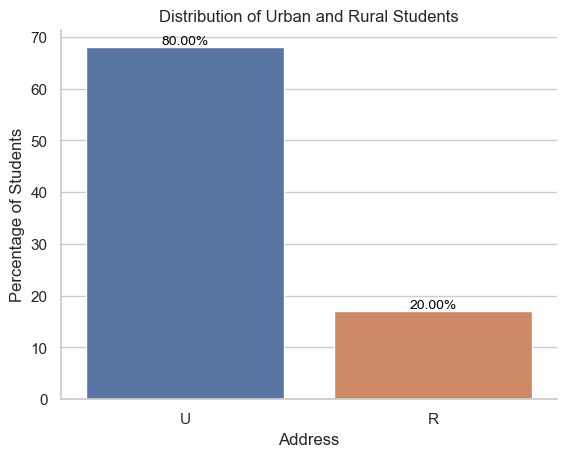

In [16]:
sns.set(style="whitegrid")  # Setting style for seaborn plot

# Countplot to show distribution of urban and rural students
sns.countplot(data=df_merge, x='address')

plt.title('Distribution of Urban and Rural Students')
plt.xlabel('Address')
plt.ylabel('Percentage of Students')  # Change ylabel to indicate percentage

# Calculate percentage for each bar
total = len(df_merge)  # Total number of students

ax = plt.gca()
for p in ax.patches:
    percentage = p.get_height() / total * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

sns.despine()
plt.show()


#### As shown, the majority of students reside in cities.

### **Relationship between grades and family size**

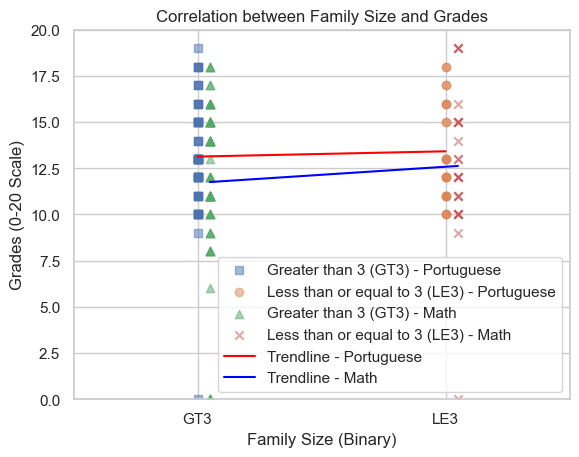

In [17]:


# Assuming df_merge is your DataFrame
# Convert 'famsize' to a numerical binary variable (0 or 1)
df_merge['famsize_numeric'] = df_merge['famsize'].map({'GT3': 0, 'LE3': 1})

# Separate data for small and large families in Portuguese
small_family_grades_por = df_merge[df_merge['famsize_numeric'] == 0]['G3_por']
large_family_grades_por = df_merge[df_merge['famsize_numeric'] == 1]['G3_por']

# Separate data for small and large families in Math
small_family_grades_mat = df_merge[df_merge['famsize_numeric'] == 0]['G3_mat']
large_family_grades_mat = df_merge[df_merge['famsize_numeric'] == 1]['G3_mat']

# Plotting data points with shapes for binary data in Portuguese
plt.scatter([0] * len(small_family_grades_por), small_family_grades_por, label='Greater than 3 (GT3) - Portuguese', alpha=0.5, marker='s')
plt.scatter([1] * len(large_family_grades_por), large_family_grades_por, label='Less than or equal to 3 (LE3) - Portuguese', alpha=0.5, marker='o')

# Plotting data points with shapes for binary data in Math
plt.scatter([0.05] * len(small_family_grades_mat), small_family_grades_mat, label='Greater than 3 (GT3) - Math', alpha=0.5, marker='^')
plt.scatter([1.05] * len(large_family_grades_mat), large_family_grades_mat, label='Less than or equal to 3 (LE3) - Math', alpha=0.5, marker='x')

# Plotting trendlines for Portuguese and Math
plt.plot([0, 1], [small_family_grades_por.mean(), large_family_grades_por.mean()], color='red', label='Trendline - Portuguese')
plt.plot([0.05, 1.05], [small_family_grades_mat.mean(), large_family_grades_mat.mean()], color='blue', label='Trendline - Math')

# Setting labels and title
plt.xlabel('Family Size (Binary)')
plt.ylabel('Grades (0-20 Scale)')
plt.title('Correlation between Family Size and Grades')

# Setting x-axis ticks and limits
plt.xticks([0, 1], ['GT3', 'LE3'])
plt.xlim(-0.5, 1.5)

# Setting y-axis limits
plt.ylim(0, 20)

# Adding legend
plt.legend()

# Display the plot
plt.show()



#### For Portuguese class, students from smaller families tend to have slightly higher grades than those in larger families. This is not significant though.
#### For Math class, students from smaller families tend to have slightly higher grades than those in larger families. Like students in Portuguese class, the difference is not very significant.  

### **Relationship between parental status and grades** 

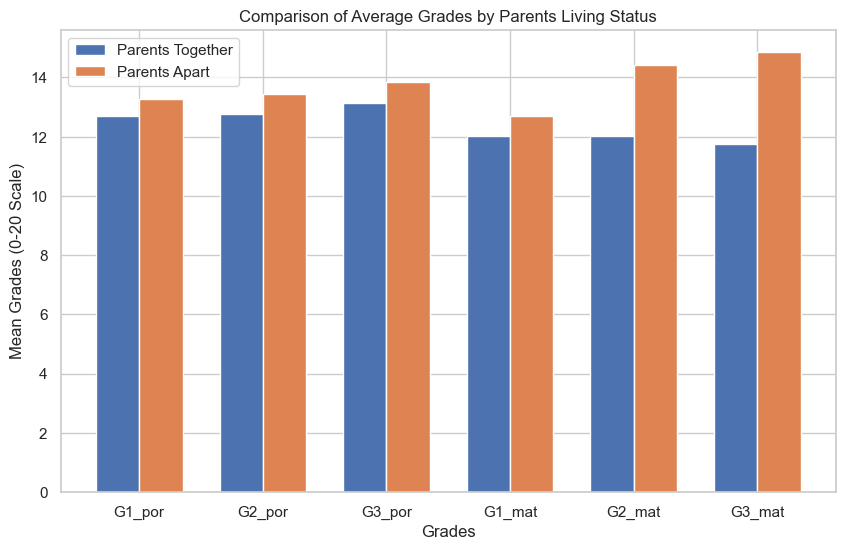

In [18]:
plt.figure(figsize=(10,6))

together_grades = df_merge[df_merge['Pstatus'] == 'T'][['G1_por', 'G2_por', 'G3_por','G1_mat','G2_mat', 'G3_mat']]
apart_grades = df_merge[df_merge['Pstatus'] == 'A'][['G1_por','G2_por', 'G3_por','G1_mat','G2_mat', 'G3_mat']]

together_means= together_grades.mean()
apart_means=apart_grades.mean()

N=len(together_means)
ind=np.arange(N)

width = .35

plt.bar(ind,together_means,width,label='Parents Together')
plt.bar(ind + width,apart_means,width,label='Parents Apart')

plt.xlabel('Grades')
plt.ylabel('Mean Grades (0-20 Scale)')
plt.title('Comparison of Average Grades by Parents Living Status')
plt.xticks(ind + width /2, ['G1_por','G2_por','G3_por','G1_mat','G2_mat','G3_mat'])

plt.legend()
plt.show()

#### As depicted, it looks like in general students whose parents are apart receive higher grades.

### **Relationship between parents education level and students' final grades in portugese and math class.**

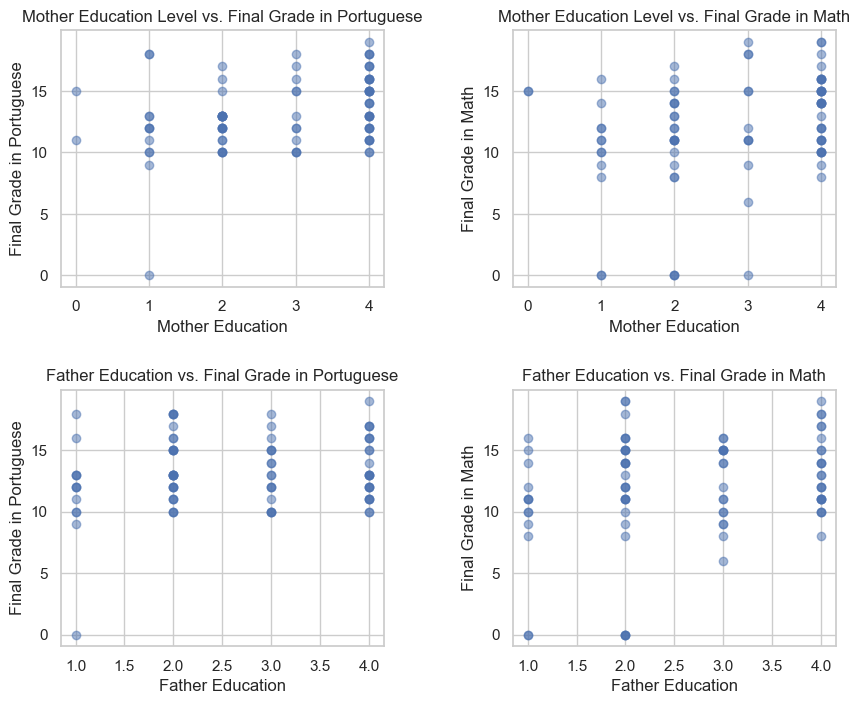

In [19]:
plt.figure(figsize=(10,8))

#G3_por vs Medu
plt.subplot(2,2,1)
plt.scatter(df_merge['Medu'],df_merge['G3_por'],alpha = 0.5)
plt.xlabel('Mother Education')
plt.ylabel('Final Grade in Portuguese')
plt.title('Mother Education Level vs. Final Grade in Portuguese')

#G3_mat vs. Medu
plt.subplot(2,2,2)
plt.scatter(df_merge['Medu'],df_merge['G3_mat'],alpha = 0.5)
plt.xlabel('Mother Education')
plt.ylabel('Final Grade in Math')
plt.title('Mother Education Level vs. Final Grade in Math')

#G3_por vs Fedu
plt.subplot(2, 2, 3)
plt.scatter(df_merge['Fedu'], df_merge['G3_por'], alpha=0.5)
plt.xlabel('Father Education')
plt.ylabel('Final Grade in Portuguese')
plt.title('Father Education vs. Final Grade in Portuguese')

#G3_mat vs Fedu
plt.subplot(2, 2, 4)
plt.scatter(df_merge['Fedu'], df_merge['G3_mat'], alpha=0.5)
plt.xlabel('Father Education')
plt.ylabel('Final Grade in Math')
plt.title('Father Education vs. Final Grade in Math')

plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

#### **Mother's Education Level**:In portuguese and math classes students tend to have higher final grades whose mothers have higher education levels.
#### **Father's Education Level**: Students with fathers of higher education fair better in math and portuguese classes. 

### **Correlation between parents' occupations and students' grades.**

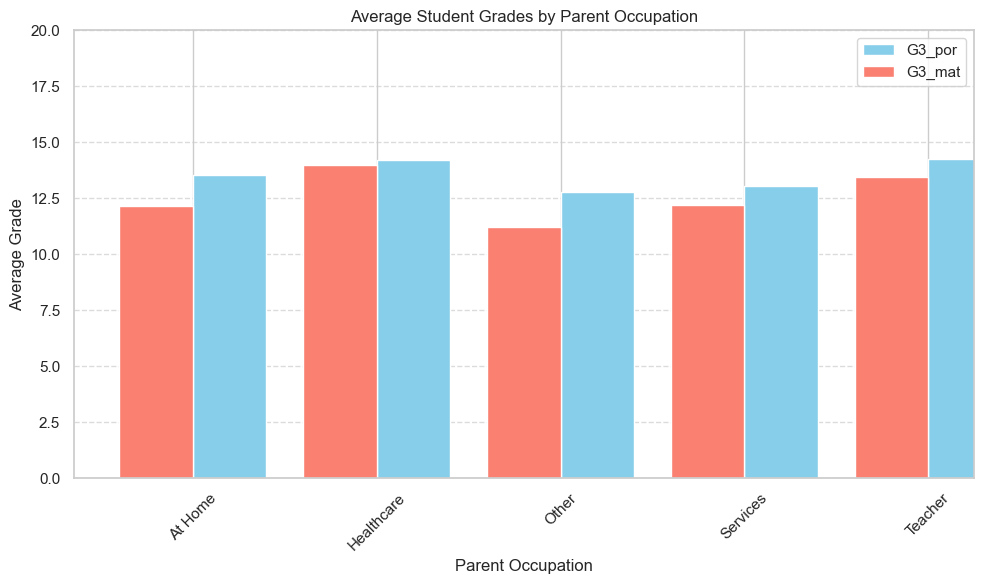

In [20]:
# Update occupation_mapping for G3_mat
occupation_mapping = {
    'teacher': 'Teacher',
    'health': 'Healthcare',
    'services': 'Services',
    'at_home': 'At Home',
    'other': 'Other'
}

# Map occupation values to meaningful labels
df_merge['Mjob'] = df_merge['Mjob'].map(occupation_mapping)
df_merge['Fjob'] = df_merge['Fjob'].map(occupation_mapping)

# Calculate average grades for G3_por and G3_mat by parent occupation
avg_grades_by_mjob_por = df_merge.groupby('Mjob')['G3_por'].mean()
avg_grades_by_fjob_por = df_merge.groupby('Fjob')['G3_por'].mean()
avg_grades_by_parent_job_por = avg_grades_by_mjob_por.add(avg_grades_by_fjob_por, fill_value=0) / 2

avg_grades_by_mjob_mat = df_merge.groupby('Mjob')['G3_mat'].mean()
avg_grades_by_fjob_mat = df_merge.groupby('Fjob')['G3_mat'].mean()
avg_grades_by_parent_job_mat = avg_grades_by_mjob_mat.add(avg_grades_by_fjob_mat, fill_value=0) / 2

# Plot the bar charts for G3_por and G3_mat
plt.figure(figsize=(10, 6))

# Plot the bar chart for G3_por
avg_grades_by_parent_job_por.plot(kind='bar', color='skyblue', position = 0, width = 0.4, label='G3_por')

# Plot the bar chart for G3_mat with a different color
avg_grades_by_parent_job_mat.plot(kind='bar', color='salmon',position = 1, width = 0.4, label='G3_mat')

# Add title and labels
plt.title('Average Student Grades by Parent Occupation')
plt.xlabel('Parent Occupation')
plt.ylabel('Average Grade')
plt.xticks(rotation=45)
plt.ylim(0, 20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()



#### Students with parents in professions such as healthcare or teaching have higher grades.  Also, in general students faired better in Portuguese than math classes. This visualization suggests that students of lower socioeconomic status and less parental support may benefit from assistance and homework help at home.

### **Do students who choose school based on course preference perform better academically?**

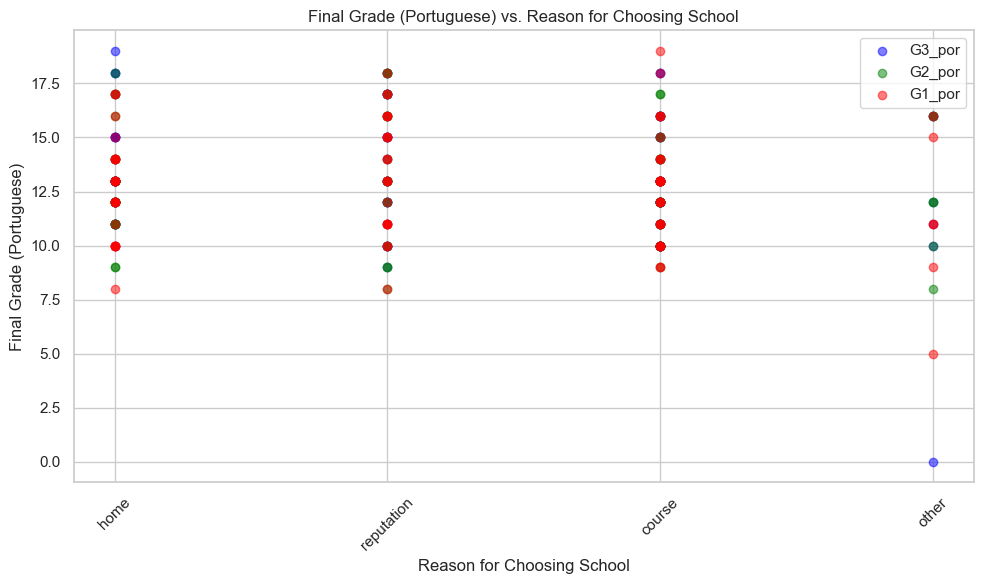

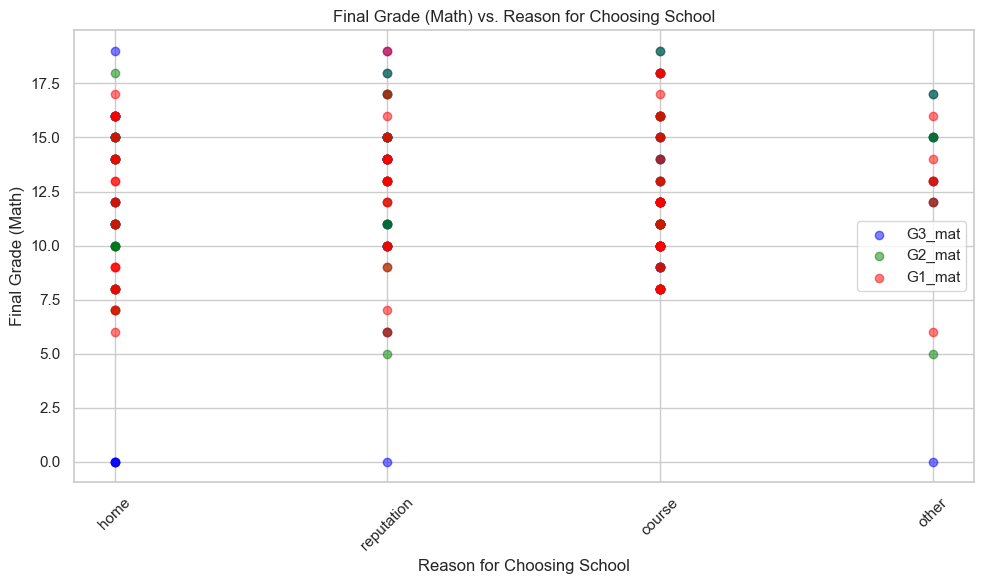

In [21]:
reason_mapping = {'home': 0,
                  'reputation': 1,
                  'course': 2,
                  'other': 3}

df_merge['reason_encoded'] = df_merge['reason'].map(reason_mapping)

plt.figure(figsize=(10,6))
plt.scatter(df_merge['reason_encoded'], df_merge['G3_por'], alpha=0.5, label='G3_por', color='blue')
plt.scatter(df_merge['reason_encoded'], df_merge['G2_por'], alpha=0.5, label='G2_por', color='green')
plt.scatter(df_merge['reason_encoded'], df_merge['G1_por'], alpha=0.5, label='G1_por', color='red')
plt.xticks(range(len(reason_mapping)), reason_mapping.keys(), rotation=45)
plt.xlabel('Reason for Choosing School')
plt.ylabel('Final Grade (Portuguese)')
plt.title('Final Grade (Portuguese) vs. Reason for Choosing School')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot for Math final grades
plt.figure(figsize=(10, 6))
plt.scatter(df_merge['reason_encoded'], df_merge['G3_mat'], alpha=0.5, label='G3_mat', color='blue')
plt.scatter(df_merge['reason_encoded'], df_merge['G2_mat'], alpha=0.5, label='G2_mat', color='green')
plt.scatter(df_merge['reason_encoded'], df_merge['G1_mat'], alpha=0.5, label='G1_mat', color='red')
plt.xticks(range(len(reason_mapping)), reason_mapping.keys(), rotation=45)
plt.xlabel('Reason for Choosing School')
plt.ylabel('Final Grade (Math)')
plt.title('Final Grade (Math) vs. Reason for Choosing School')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Students who perform well in the early reporting periods tend to perform well in the last one as well. Students who chose the school based on reputation seem to have more consistent performance across grading periods. Students who chose the school based on course as well as proximity to home demonstrate more variability across grade terms.

### **Proximity to school**

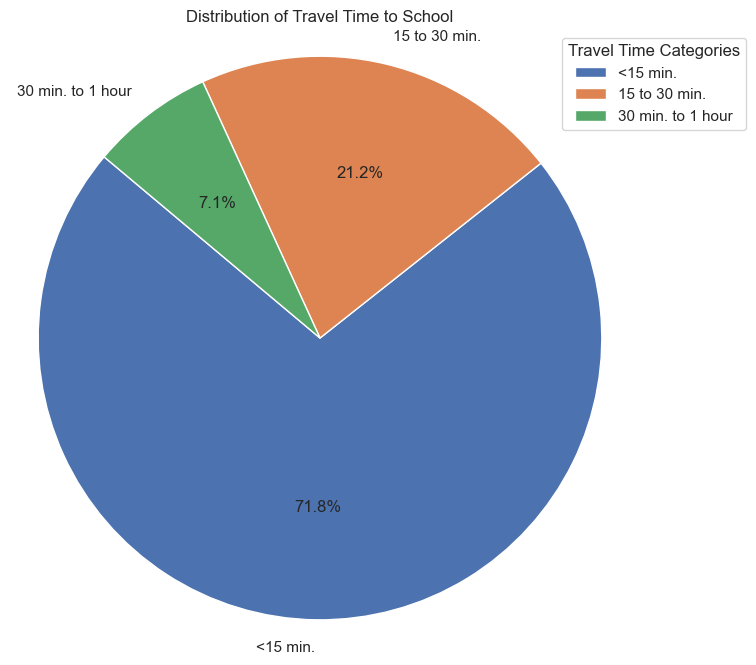

In [22]:


# Define categories for travel time
def categorize_travel_time(travel_time):
    if travel_time == 1:
        return '<15 min.'
    elif travel_time == 2:
        return '15 to 30 min.'
    elif travel_time == 3:
        return '30 min. to 1 hour'
    elif travel_time == 4:
        return '>1 hour'
    else:
        return 'Unknown'

# Apply the categorization function to create a new column 'travel_time_category'
df_merge['travel_time_category'] = df_merge['traveltime'].apply(categorize_travel_time)

# Calculate the count of students in each travel time category
travel_time_counts = df_merge['travel_time_category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(travel_time_counts, labels=travel_time_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Travel Time to School')
plt.legend(title="Travel Time Categories", loc="upper right", bbox_to_anchor=(1.2,1))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#### Over 70% of students travel under 15 minutes each way to school.

### **Proximity to school and final grades**

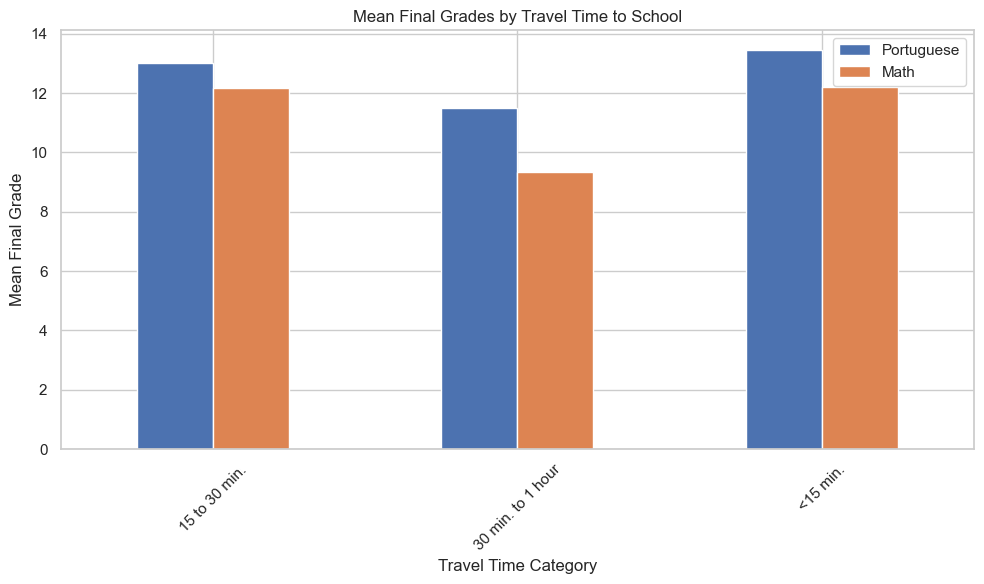

In [23]:
# Define categories for travel time
def categorize_travel_time(travel_time):
    if travel_time == 1:
        return '<15 min.'
    elif travel_time == 2:
        return '15 to 30 min.'
    elif travel_time == 3:
        return '30 min. to 1 hour'
    else:
        return 'Unknown'


# Apply the categorization function to create a new column 'travel_time_category'
df_merge['travel_time_category'] = df_merge['traveltime'].apply(categorize_travel_time)

# Calculate the mean final grades for each travel time category
mean_grades_by_travel_time = df_merge.groupby('travel_time_category')[['G3_por', 'G3_mat']].mean()

# Plotting the bar plot
mean_grades_by_travel_time.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Final Grades by Travel Time to School')
plt.xlabel('Travel Time Category')
plt.ylabel('Mean Final Grade')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(['Portuguese', 'Math'])

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



#### By examining this graph, we see that students with shorter travel time have slightly higher mean final grades as compared to students traveling for longer amounts of time. 

### **Relationship between grades per period and amount of school support utilized**

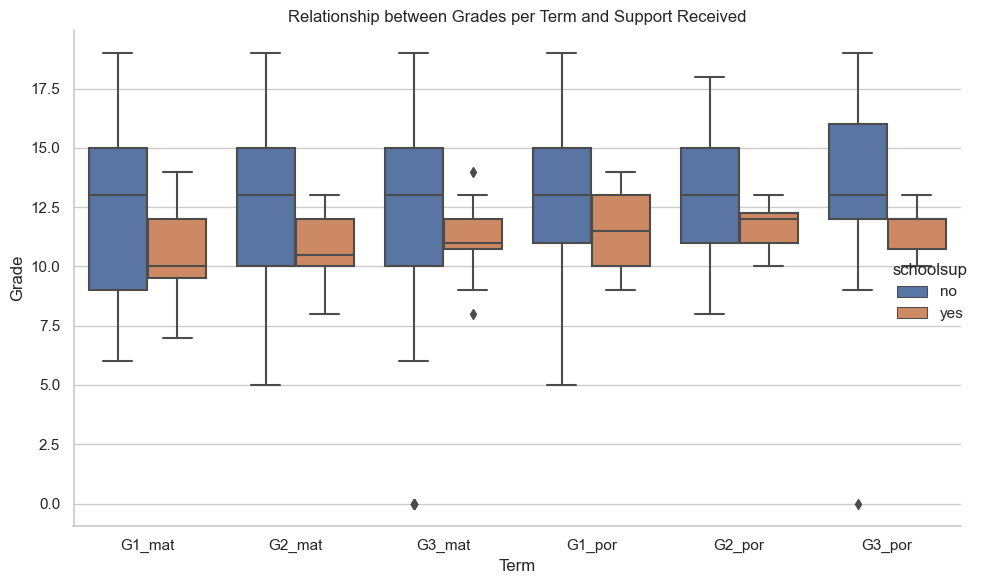

In [24]:
# Melt the DataFrame to convert grade columns into rows
df_melted = df_merge.melt(id_vars='schoolsup', value_vars=['G1_mat', 'G2_mat', 'G3_mat', 'G1_por', 'G2_por', 'G3_por'], var_name='Term', value_name='Grade')

# Plotting the relationship between grades per period and support received
sns.catplot(x='Term', y='Grade', hue='schoolsup', kind='box', data=df_melted, height=6, aspect=1.5)
plt.title('Relationship between Grades per Term and Support Received')
plt.xlabel('Term')
plt.ylabel('Grade')
plt.tight_layout()
plt.show()


#### This graph shows that school support does not necessarily lead to increased grades. Hence, it indicates that students who recevie school support may still struggle academically. Since there is variability in grades other factors may be at play. 

### **What is the grade trend among students who are involved in extracurricular activities?**

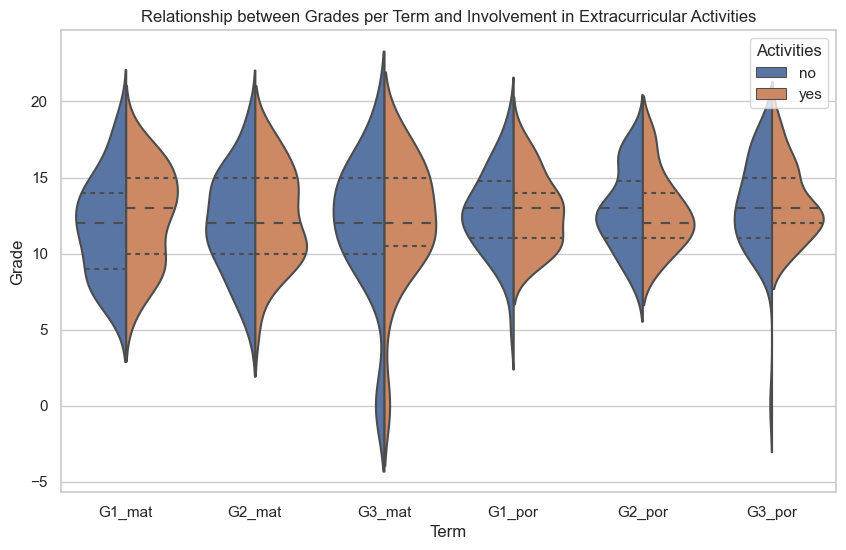

In [25]:
df_melted = df_merge.melt(id_vars='activities',value_vars=['G1_mat', 'G2_mat', 'G3_mat', 'G1_por', 'G2_por', 'G3_por'],var_name='Term',value_name='Grade')

plt.figure(figsize=(10,6))
sns.violinplot(x='Term',y='Grade',hue='activities',data=df_melted,split=True, inner="quartile")
plt.title('Relationship between Grades per Term and Involvement in Extracurricular Activities')
plt.xlabel('Term')
plt.ylabel('Grade')
plt.legend(title='Activities',loc='upper right')
plt.show()

#### As indicated by the Violin Plot, students in extracurricular activities have varied grades.The median grades for individuals in extracurricular activties are slightly higher than those not involved, suggesting that being involved in activities does not hinder grade performance. Please note there are outliers in this graph, suggesting that students perform much better or much worse, regardless of involvement in nonacademic activiteis. 

### **Is there a correlation between health status and absences?**

In [26]:
correlation = df_merge['health'].corr(df_merge['absences'])
print("Correlation between health status and absences:", correlation)

Correlation between health status and absences: 0.1389483642992524


#### There is a weak positive correlation indicating that as health status increases (bad to good) there tends to be a slight increase in absences. Since there is a weak correlation, other factors may also influence the number of absences. 

#### **Health status and absences visualization**

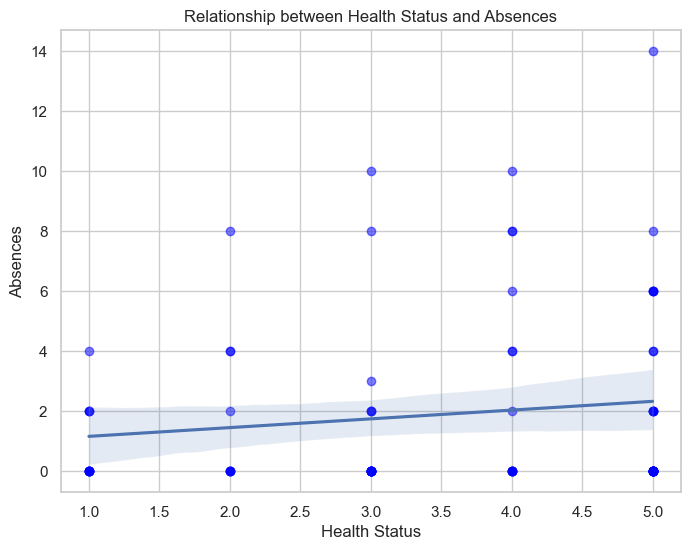

In [27]:
plt.figure(figsize=(8,6))
sns.regplot(x='health', y='absences', data=df_merge, scatter_kws={'color': 'blue', 'alpha': 0.5})
plt.title('Relationship between Health Status and Absences')
plt.xlabel('Health Status')
plt.ylabel('Absences')
plt.grid(True)
plt.show()

#### There's a slight positive trend; as health status improves, the number of absences decreases slightly. That said, the trend is weak and there are other fators that can play a factor in determining absences such as personal circumstances, workload, and social factors.

### **Relationship between Weekday, Weekend Alcohol Consumption and Students' Final Grades** 

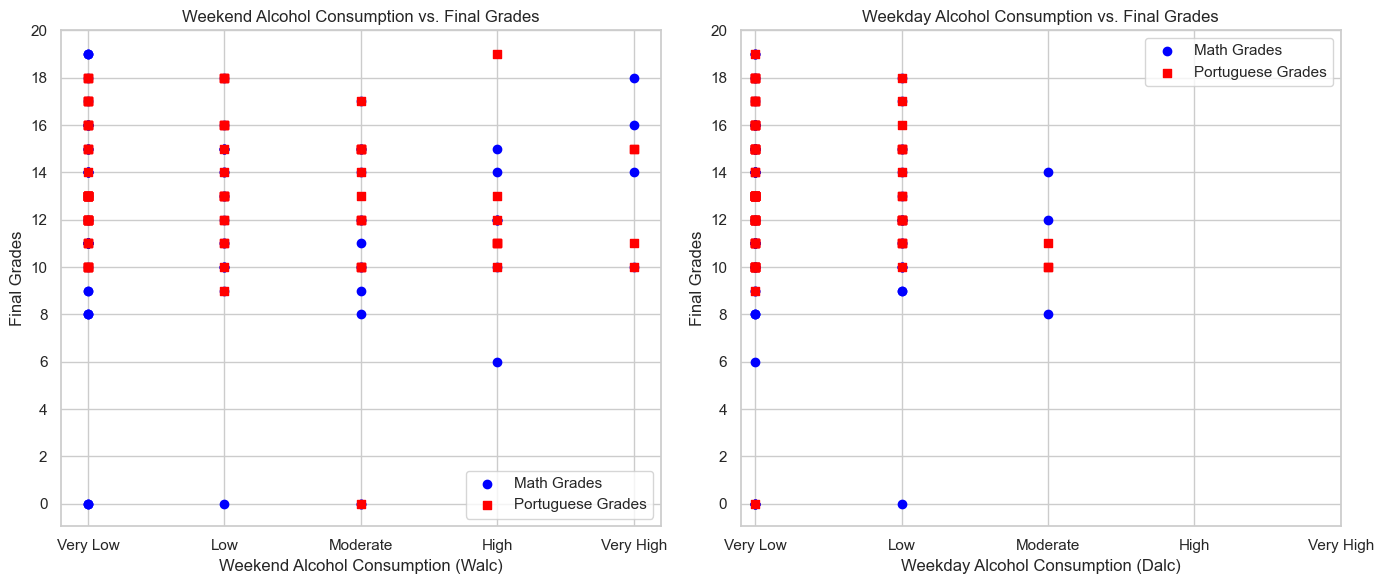

In [28]:
plt.figure(figsize=(14, 6))

# Plot for weekend alcohol consumption vs. final grades
plt.subplot(1, 2, 1)
plt.scatter(df_merge["Walc"], df_merge["G3_mat"], color='blue', label='Math Grades', marker='o')
plt.scatter(df_merge["Walc"], df_merge["G3_por"], color='red', label='Portuguese Grades', marker='s')
plt.xlabel('Weekend Alcohol Consumption (Walc)')
plt.ylabel('Final Grades')
plt.title('Weekend Alcohol Consumption vs. Final Grades')
plt.xticks(range(1, 6), ['Very Low', 'Low', 'Moderate', 'High', 'Very High'])  # Assuming alcohol consumption scale from 1 to 5
plt.yticks(range(0, 21, 2))  # Assuming final grades scale from 0 to 20
plt.legend()

# Plot for weekday alcohol consumption vs. final grades
plt.subplot(1, 2, 2)
plt.scatter(df_merge["Dalc"], df_merge["G3_mat"], color='blue', label='Math Grades', marker='o')
plt.scatter(df_merge["Dalc"], df_merge["G3_por"], color='red', label='Portuguese Grades', marker='s')
plt.xlabel('Weekday Alcohol Consumption (Dalc)')
plt.ylabel('Final Grades')
plt.title('Weekday Alcohol Consumption vs. Final Grades')
plt.xticks(range(1, 6), ['Very Low', 'Low', 'Moderate', 'High', 'Very High'])  # Assuming alcohol consumption scale from 1 to 5
plt.yticks(range(0, 21, 2))  # Assuming final grades scale from 0 to 20
plt.legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

#### As observable from these graphs, it looks like weekday drinking has a more detrimental affect on grades. It also indicates that alcohol has a more negative impact on certain subjects, in this case math. Other potential confounding variables such as socioeconomic status,study habits, parental involvement and mental health may also influence final grades.

### **Internet access and grades across terms in Portuguese Class**

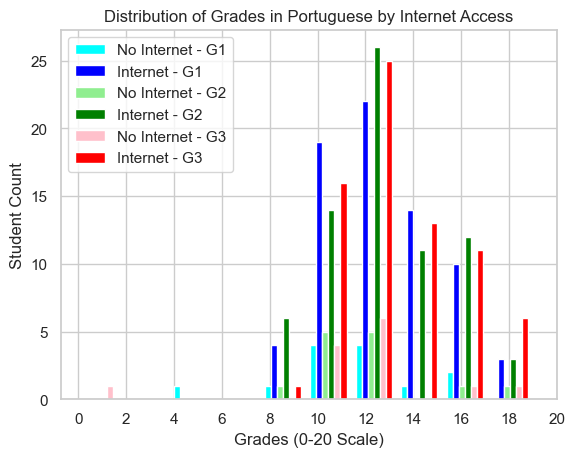

In [29]:
# Filter data for students with and without internet access
no_internet_g1 = df_merge[df_merge['internet'] == 'no']['G1_por']
internet_g1 = df_merge[df_merge['internet'] == 'yes']['G1_por']

no_internet_g2 = df_merge[df_merge['internet'] == 'no']['G2_por']
internet_g2 = df_merge[df_merge['internet'] == 'yes']['G2_por']

no_internet_g3 = df_merge[df_merge['internet'] == 'no']['G3_por']
internet_g3 = df_merge[df_merge['internet'] == 'yes']['G3_por']

# Plotting the data with distinct colors
plt.hist([no_internet_g1, internet_g1, no_internet_g2, internet_g2, no_internet_g3, internet_g3], bins=10, color=['cyan', 'blue', 'lightgreen', 'green', 'pink', 'red'], label=['No Internet - G1', 'Internet - G1', 'No Internet - G2', 'Internet - G2', 'No Internet - G3', 'Internet - G3'])

# Adding labels and legend
plt.title('Distribution of Grades in Portuguese by Internet Access')
plt.xlabel('Grades (0-20 Scale)')
plt.ylabel('Student Count')
plt.xticks(range(0, 21, 2))
plt.legend()

# Show plot
plt.show()


#### This graph suggests that students in portuguese class with internet have slightly higher grades than those without. Additionally, term 3 grades appear to be on the upper end of the scale. Hence, internet access has a positive correlation with academic performance.Students without internet access could have difficulty accessing material, for instance, outsdie of school. 

### **Internet access and grades across terms in Math Class**

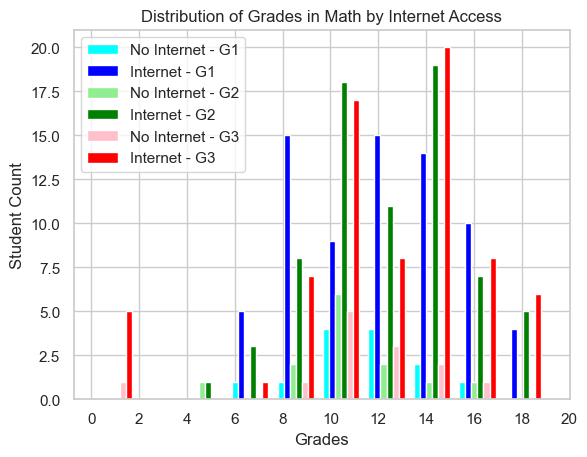

In [30]:
# Assuming df_merge is your DataFrame containing the data

# Filter data for students with and without internet access
no_internet_g1 = df_merge[df_merge['internet'] == 'no']['G1_mat']
internet_g1 = df_merge[df_merge['internet'] == 'yes']['G1_mat']

no_internet_g2 = df_merge[df_merge['internet'] == 'no']['G2_mat']
internet_g2 = df_merge[df_merge['internet'] == 'yes']['G2_mat']

no_internet_g3 = df_merge[df_merge['internet'] == 'no']['G3_mat']
internet_g3 = df_merge[df_merge['internet'] == 'yes']['G3_mat']

# Plotting the data with distinct colors
plt.hist([no_internet_g1, internet_g1, no_internet_g2, internet_g2, no_internet_g3, internet_g3], bins=10, color=['cyan', 'blue', 'lightgreen', 'green', 'pink', 'red'], label=['No Internet - G1', 'Internet - G1', 'No Internet - G2', 'Internet - G2', 'No Internet - G3', 'Internet - G3'])

# Adding labels and legend
plt.title('Distribution of Grades in Math by Internet Access')
plt.xlabel('Grades')
plt.ylabel('Student Count')
plt.xticks(range(0, 21, 2))
plt.legend()

# Show plot
plt.show()

#### As with students in Portuguese class, students in Math fair better academically than students without internet access. This could possibly due to tutorials and interactive learning available for students online. 

#### **Influence of Romantic Relationships on Academic Performance**

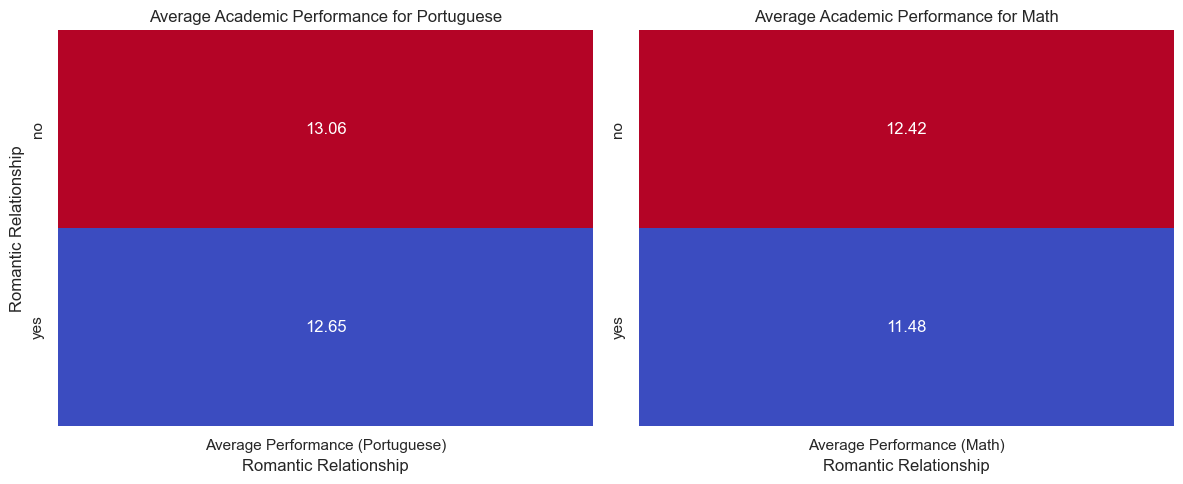

In [31]:
#average academic performance for Portuguese and Math subjects
df_merge['average_performance_por'] = (df_merge['G1_por'] + df_merge['G2_por'] + df_merge['G3_por'])/3
df_merge['average_performance_mat'] = (df_merge['G1_mat'] + df_merge['G2_mat'] + df_merge['G3_mat'])/3

#Group data by romantic column
grouped_data_por = df_merge.groupby('romantic')['average_performance_por'].mean().reset_index()
grouped_data_mat = df_merge.groupby('romantic')['average_performance_mat'].mean().reset_index()

#create new data frame for heatmap
heatmap_data_por = pd.DataFrame({grouped_data_por.columns[0]:grouped_data_por['romantic'],'Average Performance (Portuguese)':grouped_data_por['average_performance_por']})
heatmap_data_mat = pd.DataFrame({grouped_data_mat.columns[0]: grouped_data_mat['romantic'], 'Average Performance (Math)': grouped_data_mat['average_performance_mat']})

# Plot heatmap for Portuguese
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(data=heatmap_data_por.set_index('romantic'), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Average Academic Performance for Portuguese')
plt.xlabel('Romantic Relationship')
plt.ylabel('Romantic Relationship')

# Plot heatmap for Math
plt.subplot(1, 2, 2)
sns.heatmap(data=heatmap_data_mat.set_index('romantic'), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Average Academic Performance for Math')
plt.xlabel('Romantic Relationship')
plt.ylabel('')

plt.tight_layout()
plt.show()


#### By lookign at this simple heatmap there is not a substantial difference in academic performance and relationship status in Math and Portuguese classes. The consistency in performance suggests that romantic relationships do not have a significant impact on academic outcomes. 

### **Family relationship, study time and grades**

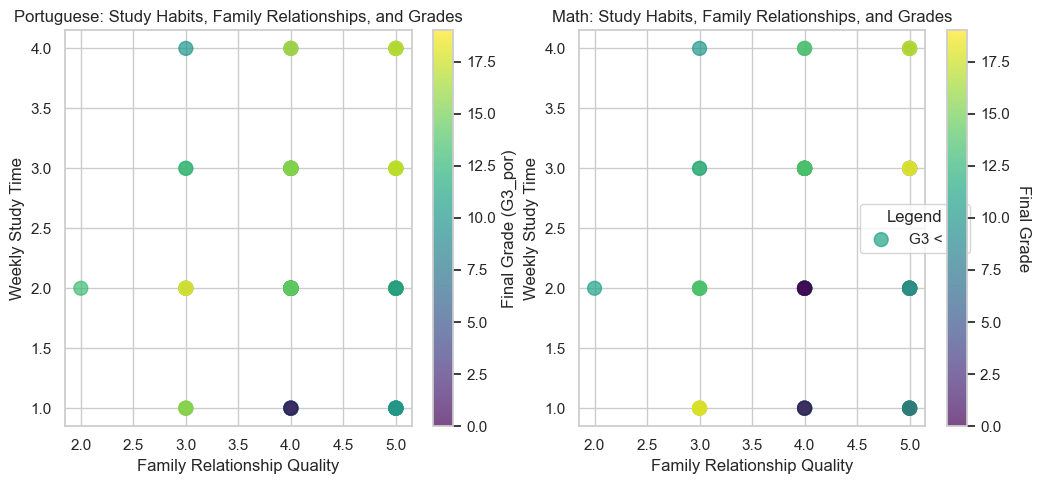

In [32]:
data_por = df_merge[['famrel','studytime', 'G3_por']]
data_mat = df_merge[['famrel','studytime','G3_mat']]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_por['famrel'], data_por['studytime'], c=data_por['G3_por'], cmap='viridis', alpha=0.7, s=100)
plt.colorbar(label='Final Grade (G3_por)')
plt.xlabel('Family Relationship Quality')
plt.ylabel('Weekly Study Time')
plt.title('Portuguese: Study Habits, Family Relationships, and Grades')
plt.grid(True)

# Plotting the graph for Math
plt.subplot(1, 2, 2)
plt.scatter(data_mat['famrel'], data_mat['studytime'], c=data_mat['G3_mat'], cmap='viridis', alpha=0.7, s=100)
plt.colorbar(label='Final Grade (G3_mat)')
plt.xlabel('Family Relationship Quality')
plt.ylabel('Weekly Study Time')
plt.title('Math: Study Habits, Family Relationships, and Grades')
plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Adjust the position of the legend
cbar_ax = plt.gcf().axes[-1]
cbar_ax.set_ylabel('Final Grade', rotation=270, labelpad=15)

plt.legend(['G3 < 10', '10 <= G3 < 15', 'G3 >= 15'], loc='center right', title='Legend', bbox_to_anchor=(1.15, 0.5))

plt.show()

#### By observing the graphs, we can see that students with better familial relationships tend to study more. 

### **Relationship between study time and final grades in Portuguese and Math Classes**

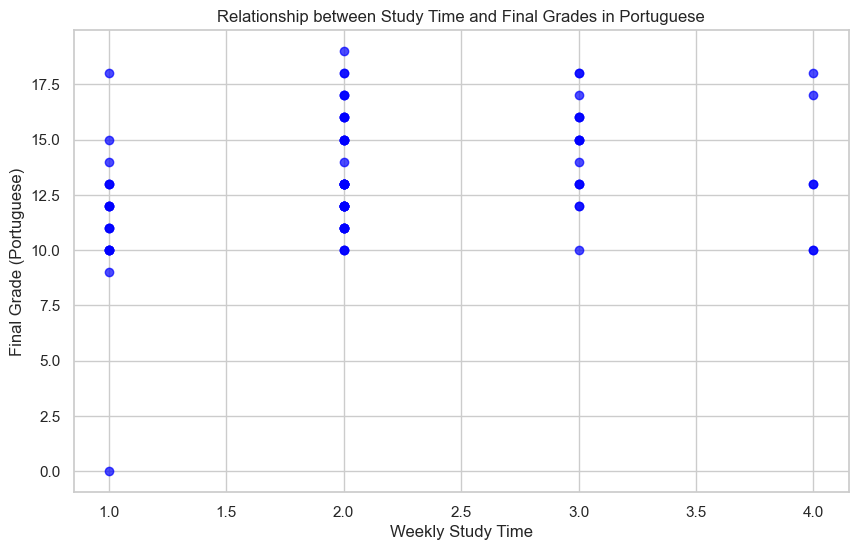

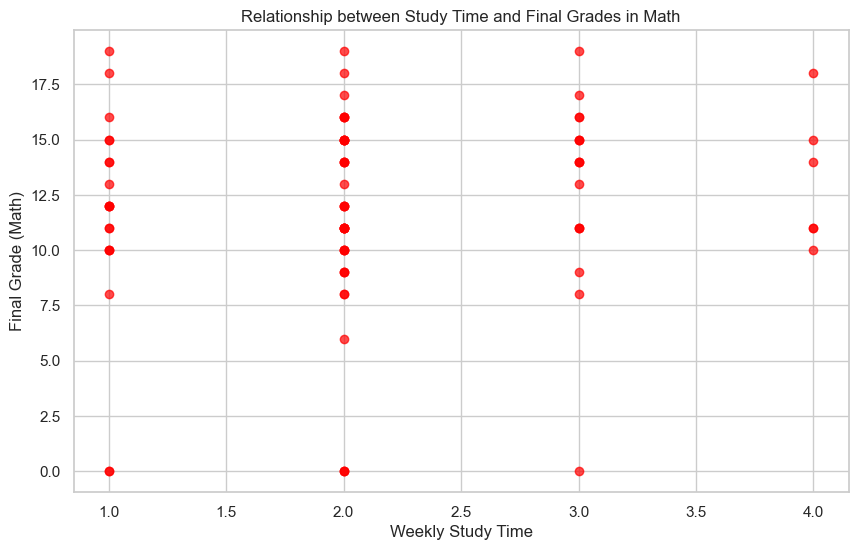

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(df_merge['studytime'],df_merge['G3_por'],color='blue',alpha=0.7)
plt.xlabel('Weekly Study Time')
plt.ylabel('Final Grade (Portuguese)')
plt.title('Relationship between Study Time and Final Grades in Portuguese')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_merge['studytime'], df_merge['G3_mat'], color='red', alpha=0.7)
plt.xlabel('Weekly Study Time')
plt.ylabel('Final Grade (Math)')
plt.title('Relationship between Study Time and Final Grades in Math')
plt.grid(True)
plt.show()

####  There is a moderate positive correlation among students who study and academic performance in Portuguese class; as they study more, their grades tend to increase. In math, however, there is a weaker correlation between study time and final grades. 

### **Do students with higher rates of absences tend to have lower final grades?**

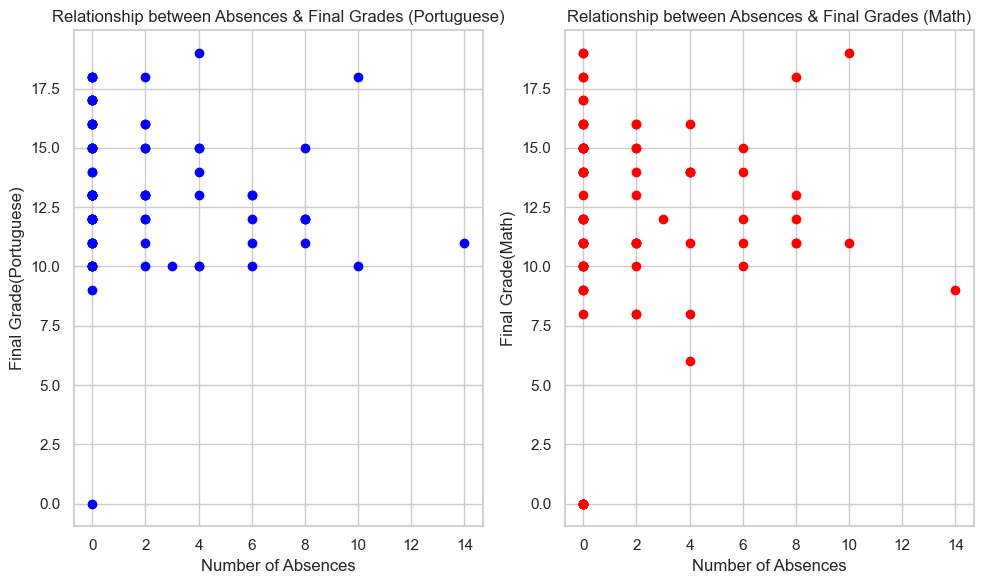

In [34]:
plt.figure(figsize = (10,6))

#Portuguese grades subplot
plt.subplot(1,2,1)
plt.scatter(df_merge['absences'],df_merge['G3_por'],color='blue')
plt.title('Relationship between Absences & Final Grades (Portuguese)')
plt.xlabel('Number of Absences')
plt.ylabel('Final Grade(Portuguese)')
plt.grid(True)

#Math grades subplot
plt.subplot(1,2,2)
plt.scatter(df_merge['absences'],df_merge['G3_mat'],color='red')
plt.title('Relationship between Absences & Final Grades (Math)')
plt.xlabel('Number of Absences')
plt.ylabel('Final Grade(Math)')
plt.grid(True)

plt.tight_layout()
plt.show()

#### As one would expect, there is a negative correlation between the variables. In both classes, as the number of absences increases, the final grade lowers.

#### **What are overall correlations between variables?**

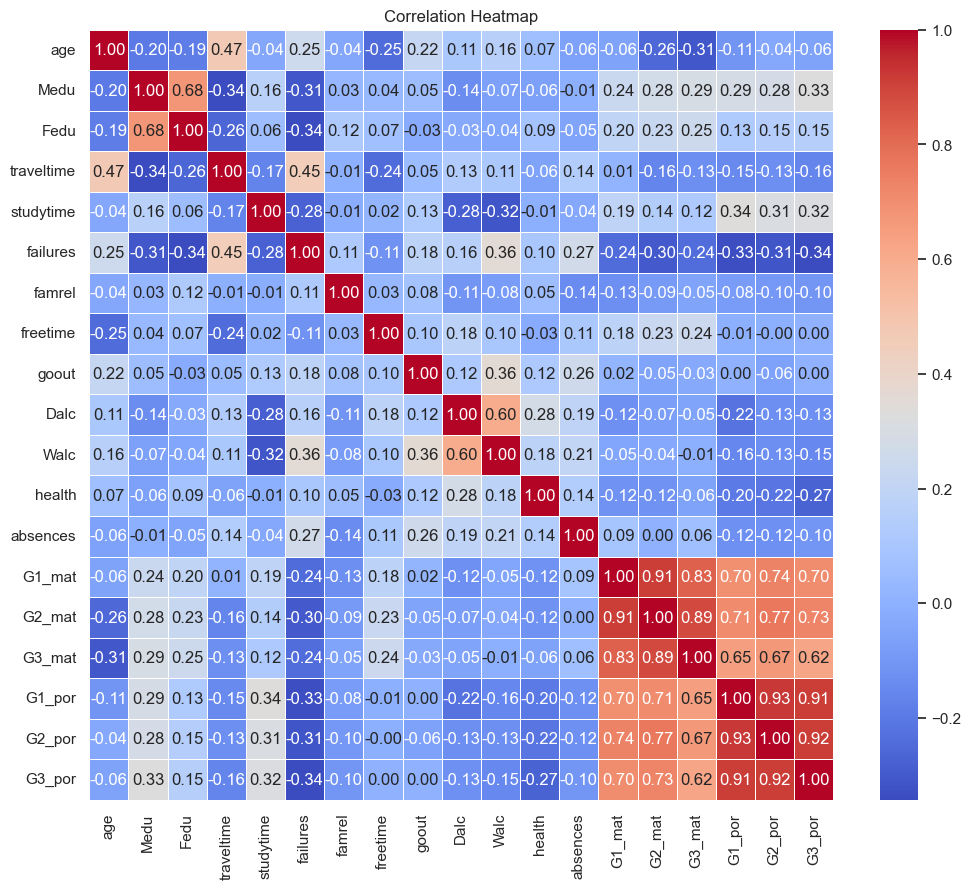

In [35]:
subset=df_merge[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                   'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 
                   'G1_mat', 'G2_mat', 'G3_mat', 'G1_por', 'G2_por', 'G3_por']]
correlation_matrix=subset.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt= ".2f", linewidth = 0.5)
plt.title('Correlation Heatmap')
plt.show()

#### **Conclusions from the heatmap:**

#### *There are strong positive correlations for grades; students who initailly did well in the first term, faired well in the ensuing terms as well

#### *Parents with higher education tend to have students who fair better with grades.

#### *There are weak correlations between age and final grades meaning that age does not play a significant roll in predicting performance 

#### * There are no prominant negative relationships indicating that there is not an inverse relationship between variables.